In [38]:


import numpy as np

#mu = -0.00033 # prior_mu
# tau = 0.0048 # tau_prior


params = {
"personalization": (-0.000551956885819281, 0.006221872255958161),
"ui_existing_members": (-0.0011652113011480628, 0.0074323600912097896),
"ui_new_to_device": (-0.005307870141683763, 0.009854099365342575)
}

names = {
  "personalization": "Personalization",
"ui_existing_members": "UI - Existing Members",
"ui_new_to_device": "UI - New Devices"  
}

sigmas = {
    "personalization": 4.012352386816238,
"ui_existing_members": 4.034071647771524,
"ui_new_to_device":  5.732263886125771,
}


program_sizes = {
  "personalization": 800,
  "ui_existing_members": 400,
  "ui_new_to_device":  600 
}

programs = ["personalization", 
            "ui_existing_members",
            "ui_new_to_device"]



In [39]:
program = programs[0]

mu = params[program][0]
tau = params[program][1] # tau_prior
sigma = sigmas[program]
mu_p = max(mu,0)

print(mu,tau, sigma)

n = 10_000_000


-0.000551956885819281 0.006221872255958161 4.012352386816238


In [40]:
from scipy.stats import norm
import matplotlib.pyplot as plt


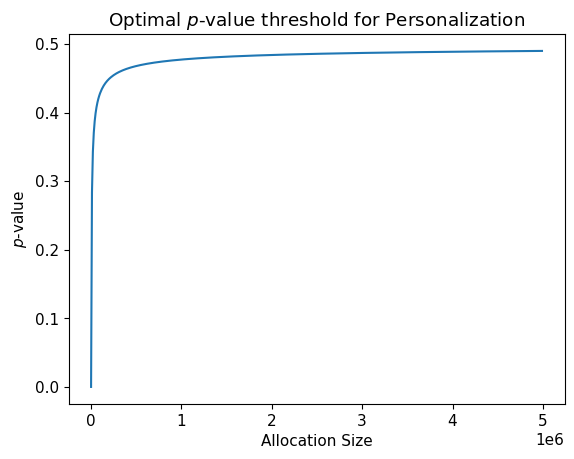

In [41]:
xs = np.arange(1,5e6,1e4)
plt.plot(xs, 1 - norm.cdf(-mu*sigma/(tau**2*np.sqrt(xs))))
plt.xlabel("Allocation Size")
plt.ylabel("$p$-value")
plt.title(f"Optimal $p$-value threshold for {names[program]}")
plt.savefig(f"../figures/optimal_pvalue_threshold_{names[program]}")
plt.show()

In [42]:
mc_samples = int(1e7)
deltas = np.random.normal(mu,tau,mc_samples)
deltas = deltas[deltas < 0]
print(len(deltas))

5351743


In [43]:
ns = np.arange(1,5e6,5e4)
res = np.zeros_like(ns)
for i in range(len(ns)):
    n = ns[i]
    res[i] = np.sum(norm.cdf(mu*sigma/(np.sqrt(n)*tau**2) + np.sqrt(n)*deltas/(sigma**2)))/mc_samples


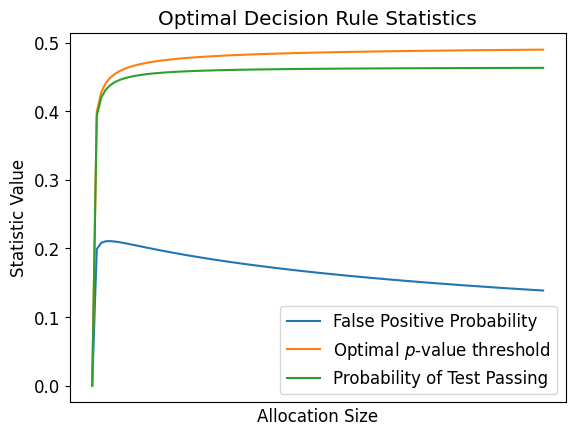

In [51]:

plt.rcParams['font.size'] = 12

fpr =  res
passing = norm.cdf(mu*np.sqrt((tau**2 + sigma**2/ns))/tau**2)
plt.plot(ns, fpr, label = "False Positive Probability")
plt.plot(ns, 1 - norm.cdf(-mu*sigma/(tau**2*np.sqrt(ns))), label =  "Optimal $p$-value threshold")
plt.plot(ns, passing, label =  "Probability of Test Passing")
#plt.plot(ns, fpr/passing, label = "Fraction of False Positive Shipped Tests")
plt.xlabel("Allocation Size")
plt.ylabel("Statistic Value")
plt.title(f"Optimal Decision Rule Statistics")

plt.xticks([])

#plt.axvline(5_000_000, linewidth = 1, linestyle = '--',color = "red")
#plt.title(f"Optimal Decision Rule Statistics")
plt.legend()
#plt.savefig(f"../figures/fpr_gaussian_{names[program]}")
plt.savefig(f"../figures/fpr_gaussian_statistics.pdf",bbox_inches='tight')


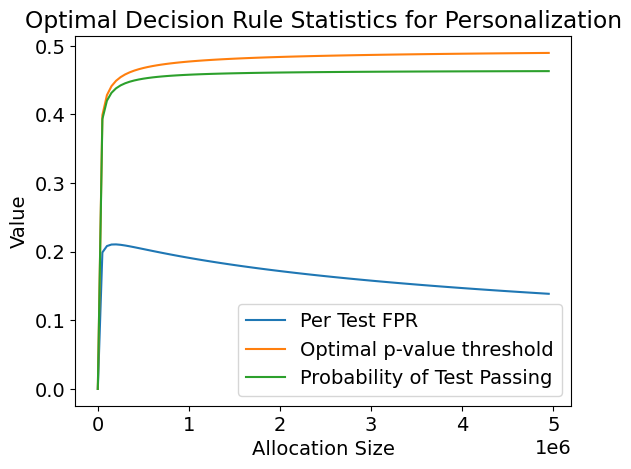

In [45]:
fpr =  res
passing = norm.cdf(mu*np.sqrt((tau**2 + sigma**2/ns))/tau**2)
plt.plot(ns, fpr, label = "Per Test FPR")
plt.plot(ns, 1 - norm.cdf(-mu*sigma/(tau**2*np.sqrt(ns))), label =  "Optimal p-value threshold")
plt.plot(ns, passing, label =  "Probability of Test Passing")
#plt.plot(ns, fpr/passing, label = "Fraction of False Positive Shipped Tests")
plt.xlabel("Allocation Size")
plt.ylabel("Value")
plt.title(f"Optimal Decision Rule Statistics for {names[program]}")

#plt.axvline(500_000, linewidth = 1, linestyle = '--',color = "red")
#plt.title(f"Optimal Decision Rule Statistics")
plt.legend()
plt.savefig(f"../figures/fpr_gaussian_{names[program]}")